In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
from ultron.factor.genetic.geneticist.operators import *

In [22]:
from kdutils.common import fetch_temp_data, fetch_temp_returns

In [23]:
method = 'bicso0'
instruments = 'ims'
total_returns = fetch_temp_returns(method=method,
                                       instruments=instruments,
                                       datasets=['train', 'val', 'test'],
                                       category='returns')

./records/bicso0/ims/returns/train_returns.feather
./records/bicso0/ims/returns/val_returns.feather
./records/bicso0/ims/returns/test_returns.feather


In [24]:
total_returns

,trade_time,code,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,nxt1_ret_5h,nxt1_ret_10h,nxt1_ret_15h,time_weight,equal_weight
0,2022-07-22 09:30:00,IM,0.001999,0.003928,0.003025,0.003425,0.003205,-0.000429,0.002813,0.002984
1,2022-07-22 09:31:00,IM,0.001929,0.001026,0.000801,0.000963,0.001354,-0.003640,0.001440,0.001252
2,2022-07-22 09:32:00,IM,-0.000903,-0.001129,-0.000504,-0.001577,-0.000532,-0.007864,-0.000912,-0.000845
3,2022-07-22 09:33:00,IM,-0.000225,0.000400,-0.000063,-0.000333,-0.001749,-0.007440,0.000010,0.000037
4,2022-07-22 09:34:00,IM,0.000625,0.000162,-0.000448,0.000600,-0.002439,-0.008227,0.000292,0.000113
...,...,...,...,...,...,...,...,...,...,...
15419,2025-03-14 14:57:00,IM,-0.000020,0.000376,0.000291,-0.001500,-0.005014,-0.003998,0.000164,0.000216
15420,2025-03-14 14:58:00,IM,0.000395,0.000311,-0.000067,-0.003830,-0.004941,-0.004136,0.000290,0.000213
15421,2025-03-14 14:59:00,IM,-0.000085,-0.000462,-0.001875,-0.002725,-0.005490,-0.003334,-0.000509,-0.000807
15422,2025-03-14 15:00:00,IM,-0.000378,-0.001791,-0.004140,-0.002350,-0.004722,-0.003642,-0.001476,-0.002103


In [14]:
factors_data = pd.read_parquet("records/sp/factor_gp_cta_all.parquet")
factors_data['trade_time'] = pd.to_datetime(factors_data['date'].astype(str) + factors_data['minTime'].astype(str).str.zfill(6), format='%Y%m%d%H%M%S')
factors_data = factors_data.drop(['date','minTime','Code'],axis=1).rename(columns={'ret_15':'nxt1_ret'})
factors_data['code'] = 'IM'
factors_data.head()

,abs(corr_ret_bid_ask_price_spread),"abs(div(net_money_in, smart_tick_out))","abs(ema(corr_money_bid_ask_price_spread, 48))","abs(ema(mci_ask, 288))","abs(ema(net_tick_in, 288))","abs(ema(smart_money_out_pct, 192))","abs(mkurtosis(money_out, 48))","abs(mkurtosis(order_flow_imbanlace_1, 96))","abs(mmad(mmin(delta_volume_bid1, 288), 96))","abs(mmad(mwavg(smart_tick_in, tick_in_pct, 24), 96))",...,"wma(ratios(money_in), 24)","wma(smart_money_in_pct, 192)","wma(smart_money_in_pct, 96)","wma(smart_money_out_pct, 192)","wma(smart_money_out_pct, 288)","wma(smart_money_out_pct, 96)","wma(tema(smart_money_out_pct, 192), 24)",nxt1_ret,trade_time,code
0,0.055472,1.518757e+07,0.056220,0.479038,4.803272,0.437133,14.531145,0.761605,0.0,2.376750,...,2.063489,0.059127,0.054450,0.422309,0.438205,0.413867,0.404770,-0.005329,2022-08-01 10:30:00,IM
1,0.026309,1.306834e+06,0.052356,0.518169,3.732191,0.449685,25.148764,0.521540,0.0,2.521897,...,1.236453,0.051613,0.032153,0.435182,0.444441,0.449750,0.424488,0.005468,2022-08-01 10:45:00,IM
2,0.046155,2.846567e+06,0.046722,0.517328,6.044904,0.440642,24.845807,0.162254,0.0,2.625722,...,1.163771,0.044099,0.016624,0.426921,0.437080,0.439296,0.432156,-0.003025,2022-08-01 11:00:00,IM
3,0.228019,3.465653e+06,0.036339,0.521333,6.553654,0.443735,31.091615,0.574441,1.0,3.455679,...,1.225730,0.037086,0.005349,0.431245,0.438188,0.450912,0.434503,0.002850,2022-08-01 11:15:00,IM
4,0.091214,1.576400e+05,0.030887,0.521253,6.568215,0.454210,2.884244,0.934706,1.0,3.163506,...,1.428557,0.022618,0.000000,0.446387,0.443922,0.466967,0.453036,0.002102,2022-08-01 13:15:00,IM


In [15]:
pred_data = pd.read_parquet("records/sp/pred_alpha_cta.parquet")
pred_data['trade_time'] = pd.to_datetime(pred_data['date'].astype(str) + pred_data['minTime'].astype(str).str.zfill(6), format='%Y%m%d%H%M%S')
pred_data = pred_data.drop(['date','minTime','Code'],axis=1)
pred_data['code'] = 'IM'
pred_data.head()

,ret_15,pred_alpha,trade_time,code
0,-0.000202,0.000417,2024-01-02 10:15:00,IM
1,0.000634,0.000015,2024-01-02 10:30:00,IM
2,-0.001118,-0.000010,2024-01-02 10:45:00,IM
3,-0.001019,0.000022,2024-01-02 11:15:00,IM
4,0.000535,0.000297,2024-01-02 13:30:00,IM


In [27]:
total_data = factors_data.merge(pred_data, on=['trade_time','code']).merge(total_returns[['trade_time','code','nxt1_ret_15h']])
total_data#.head()

,abs(corr_ret_bid_ask_price_spread),"abs(div(net_money_in, smart_tick_out))","abs(ema(corr_money_bid_ask_price_spread, 48))","abs(ema(mci_ask, 288))","abs(ema(net_tick_in, 288))","abs(ema(smart_money_out_pct, 192))","abs(mkurtosis(money_out, 48))","abs(mkurtosis(order_flow_imbanlace_1, 96))","abs(mmad(mmin(delta_volume_bid1, 288), 96))","abs(mmad(mwavg(smart_tick_in, tick_in_pct, 24), 96))",...,"wma(smart_money_out_pct, 192)","wma(smart_money_out_pct, 288)","wma(smart_money_out_pct, 96)","wma(tema(smart_money_out_pct, 192), 24)",nxt1_ret,trade_time,code,ret_15,pred_alpha,nxt1_ret_15h
0,0.088729,2.115000e+07,0.072769,0.258245,6.596840,0.451085,4.798954,1.268819,0.0,2.168122,...,0.448361,0.459256,0.423501,0.435476,-0.000202,2024-01-02 10:15:00,IM,-0.000202,0.000417,-0.000602
1,0.046670,1.527140e+07,0.077062,0.262248,7.028121,0.425015,5.838630,1.340060,0.0,2.168122,...,0.420294,0.439501,0.374209,0.377719,0.000634,2024-01-02 10:30:00,IM,0.000634,0.000015,0.000420
2,0.059561,2.938150e+06,0.087969,0.266103,6.887601,0.401120,5.634314,1.328077,0.0,2.256772,...,0.393829,0.420868,0.329009,0.326388,-0.001118,2024-01-02 10:45:00,IM,-0.001118,-0.000010,-0.000632
3,0.126579,5.206514e+06,0.099054,0.265063,6.980690,0.392266,5.375613,0.284232,0.0,2.940412,...,0.381792,0.411627,0.314517,0.283526,-0.001019,2024-01-02 11:15:00,IM,-0.001019,0.000022,-0.001426
4,0.041578,1.253845e+06,0.063491,0.268909,8.105714,0.372965,2.613262,0.301109,0.0,5.259400,...,0.352646,0.386653,0.300292,0.269259,0.000535,2024-01-02 13:30:00,IM,0.000535,0.000297,0.000313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,0.077079,3.975193e+05,0.140550,0.142932,4.173660,0.462033,1.878872,1.817232,0.0,2.052325,...,0.461614,0.458185,0.480546,0.482324,0.002001,2025-03-12 13:30:00,IM,0.002001,0.000603,0.001787
1952,0.019370,3.227650e+06,0.135289,0.142135,3.948074,0.463672,0.553656,2.021388,0.0,2.040752,...,0.464071,0.459544,0.483175,0.484557,-0.000589,2025-03-12 13:45:00,IM,-0.000589,0.000248,-0.000650
1953,0.166373,1.109804e+07,0.149089,0.141593,4.431442,0.463031,0.379154,1.620579,0.0,1.745334,...,0.464451,0.459535,0.477731,0.485190,0.000935,2025-03-12 14:00:00,IM,0.000935,0.000252,0.000486
1954,0.025794,1.219074e+06,0.144851,0.143948,4.013092,0.469659,0.809666,2.059330,0.0,2.689990,...,0.472054,0.464554,0.485081,0.486663,-0.006610,2025-03-12 14:15:00,IM,-0.006610,0.000493,-0.006092


In [28]:
from lib.aux001 import *
from lib.cux001 import *

In [29]:
evaluate1 = FactorEvaluate1(factor_data=total_data,
                                factor_name='abs(corr_ret_bid_ask_price_spread)',
                                ret_name='ret_15',
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore')

In [30]:
evaluate1.run()

INFO: IC Mean is negative. Factor has been inverted.

--- Sanity Checks & Warnings ---
✅ Return autocorrelation (0.027) is normal.
✅ Factor autocorrelation (0.008) is within a reasonable range.
⚠️  WARNING: ICIR is -0.765, which is low. Factor's predictive power is unstable.


{'total_ret': 0.13857153384684096,
 'avg_ret': 7.626042830276063e-05,
 'max_dd': -0.034261572330684054,
 'calmar': 4.0445176452902825,
 'sharpe': 0.06783771999678163,
 'turnover': 0.35683948647285324,
 'win_rate': 0.4667689161554192,
 'profit_ratio': 1.2612267123229524,
 'ic_mean': -0.0612794736171083,
 'ic_std': 0.08007010327011385,
 'ic_ir': -0.765322774848735,
 'factor_autocorr': 0.007560653906709667,
 'ret_autocorr': 0.026845174873787944}

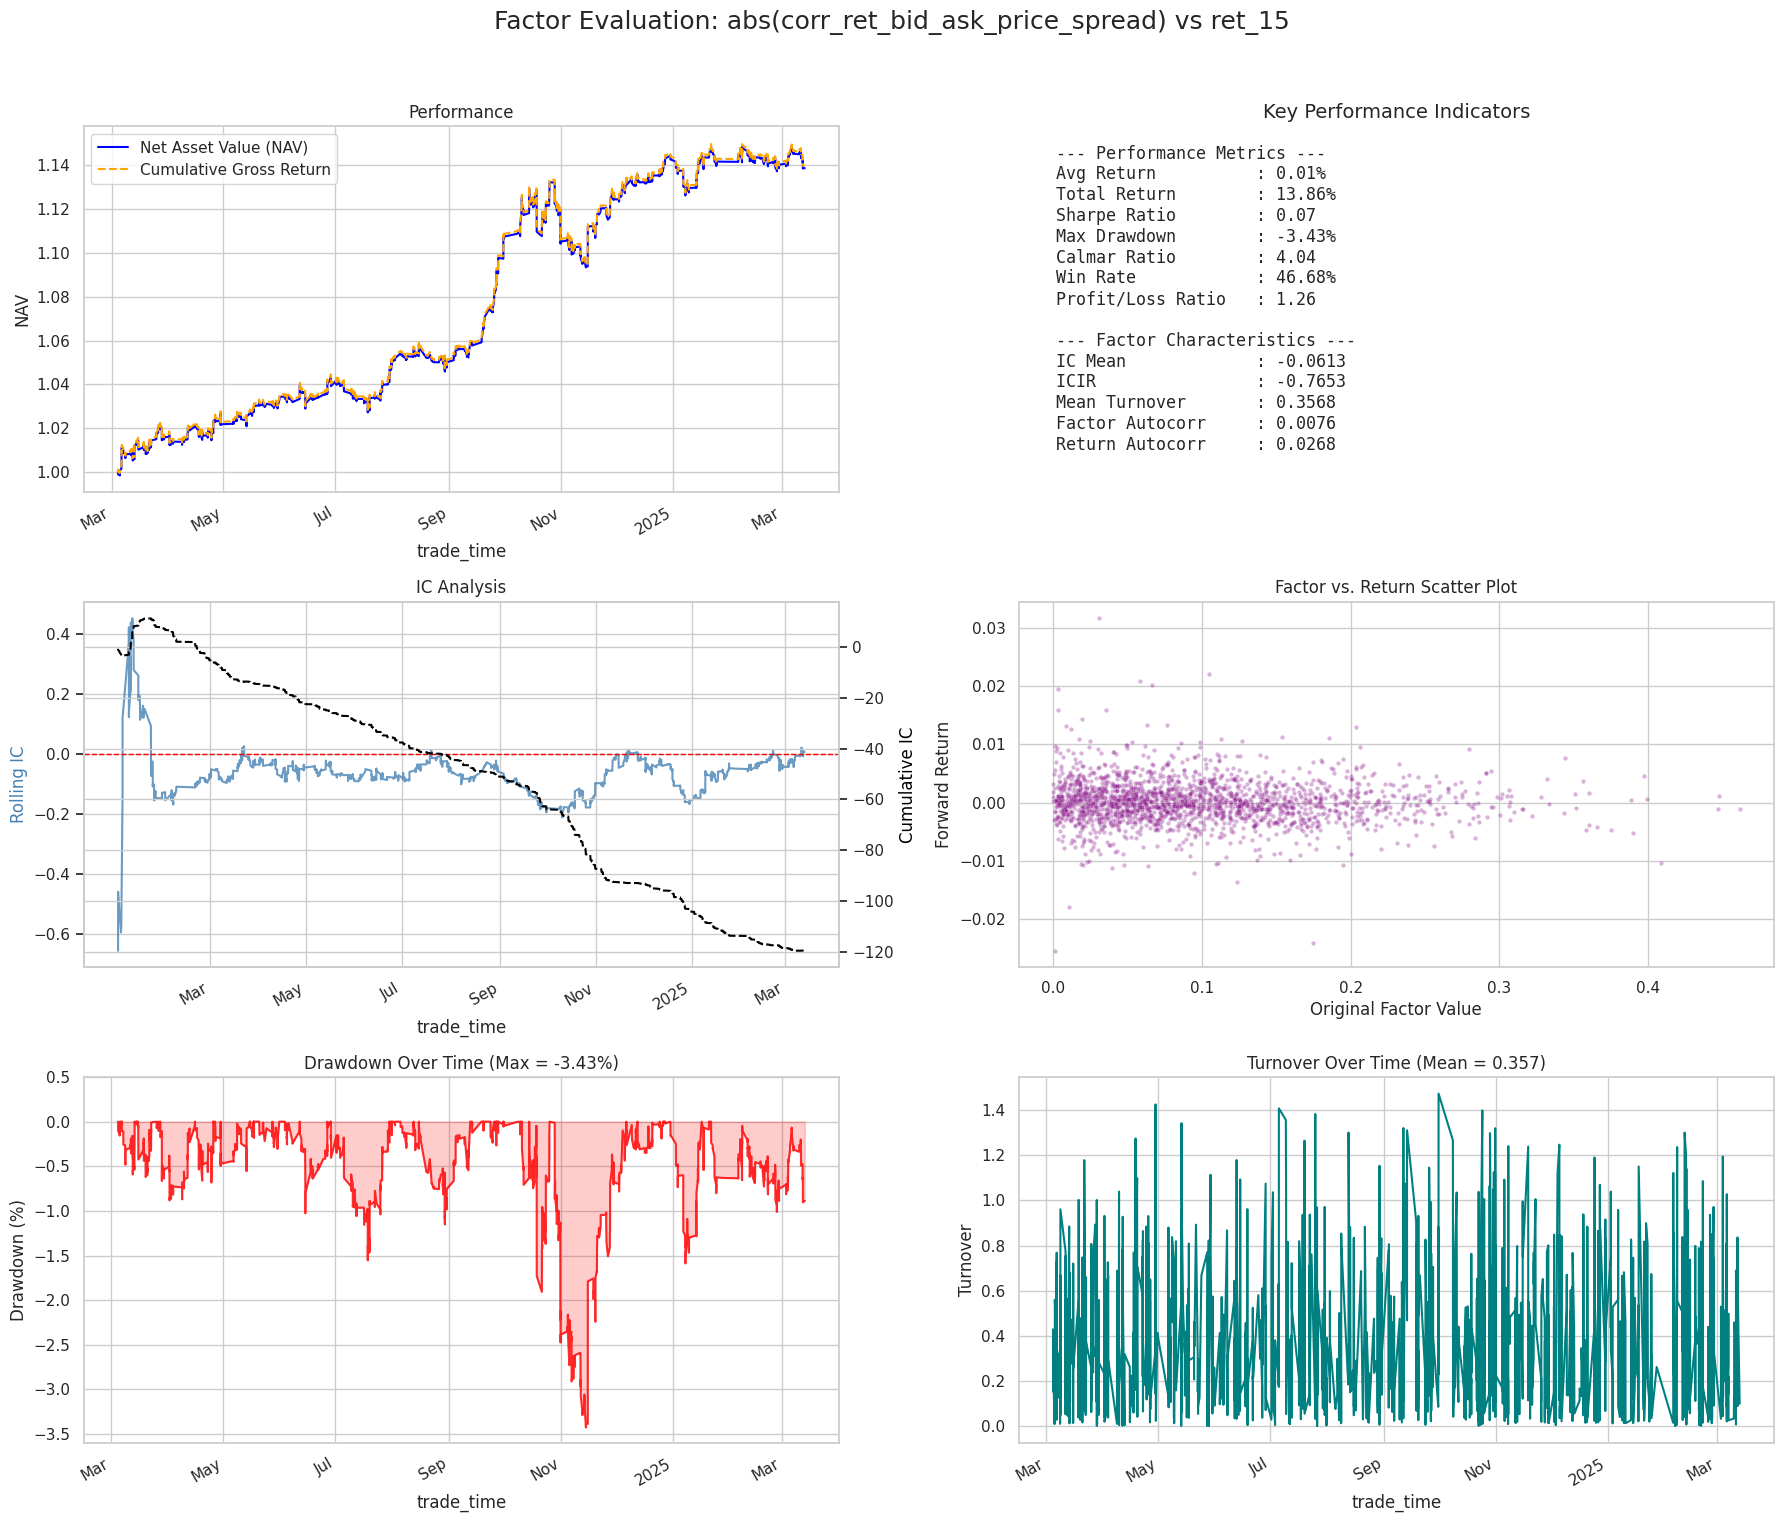

In [31]:
evaluate1.plot_results()

In [32]:
evaluate2 = FactorEvaluate1(factor_data=total_data,
                                factor_name='abs(corr_ret_bid_ask_price_spread)',
                                ret_name='nxt1_ret_15h',
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore')
evaluate2.run()

INFO: IC Mean is negative. Factor has been inverted.

--- Sanity Checks & Warnings ---
✅ Return autocorrelation (0.054) is normal.
✅ Factor autocorrelation (0.008) is within a reasonable range.
⚠️  WARNING: ICIR is -0.611, which is low. Factor's predictive power is unstable.


{'total_ret': 0.15143272647193373,
 'avg_ret': 8.304293993643535e-05,
 'max_dd': -0.04230526865185036,
 'calmar': 3.579524047421699,
 'sharpe': 0.06297785786610169,
 'turnover': 0.35683948647285324,
 'win_rate': 0.4570552147239264,
 'profit_ratio': 1.2477397863259194,
 'ic_mean': -0.049832559537743265,
 'ic_std': 0.08149827363322056,
 'ic_ir': -0.6114554004175909,
 'factor_autocorr': 0.007560653906709667,
 'ret_autocorr': 0.05385408889838778}

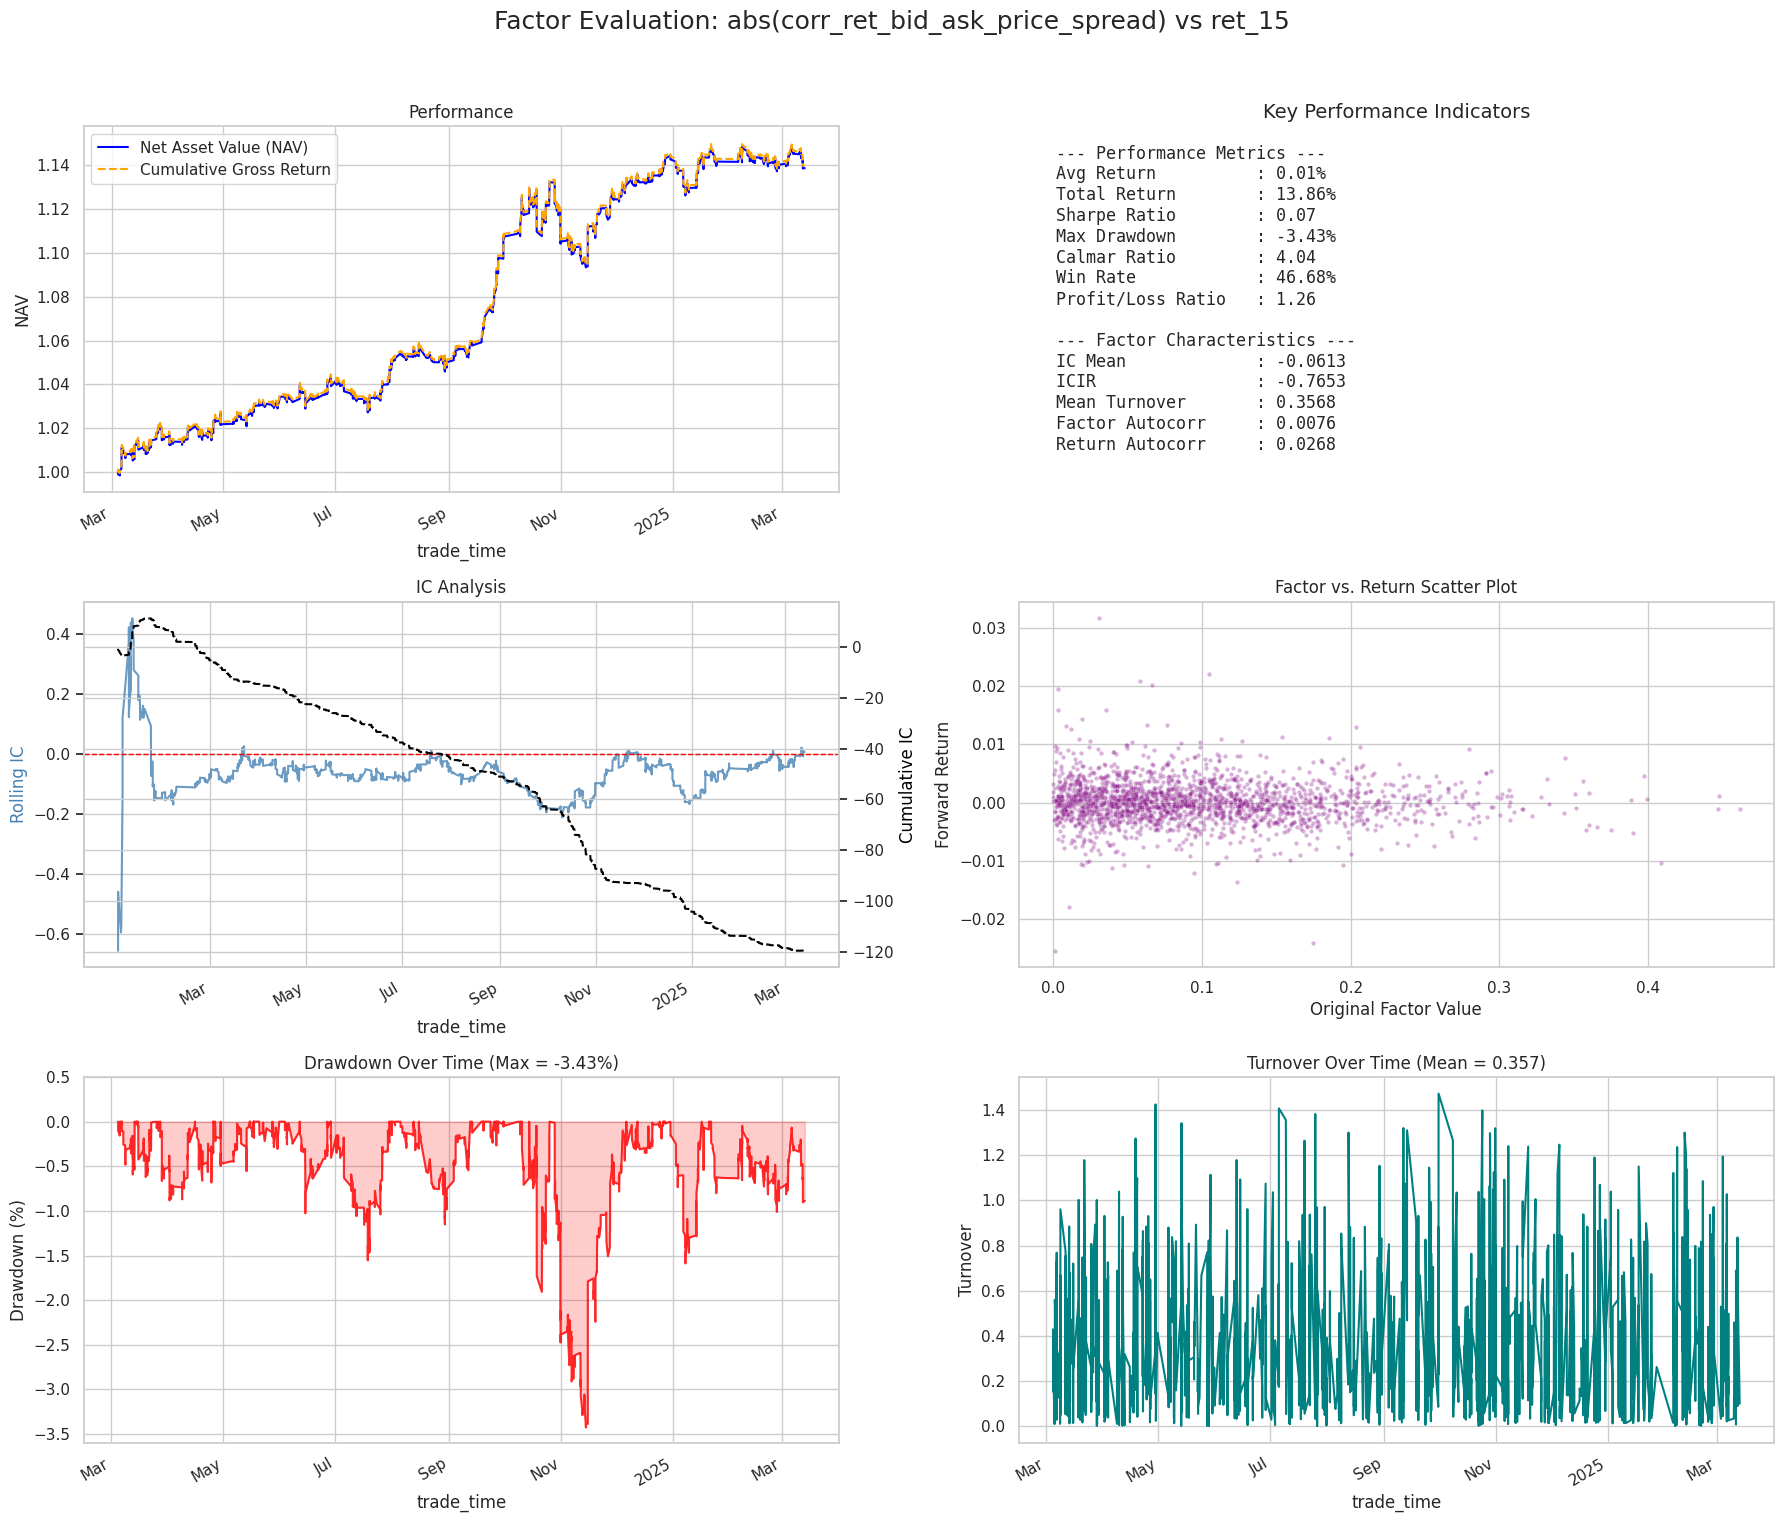

In [33]:
evaluate1.plot_results()